# OVERVIEW

This is a project about cross-cutting application programs combining data science techniques and engineering diagnostic needs. 

The main goal of this Jupyter Notebook is to use statistical methods to analyze the changes in frequency before and after strong earthquakes in the data collected by monitoring instruments in high-rise buildings, so as to determine whether the building is damaged or not. The study was conducted mainly on the TOWER1_LOWER dataset, and the same analysis method was used for all other datasets.

# 1. Data preparation

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_rel
from IPython.display import Image

In [2]:
TOWER_1_LOWER = pd.read_csv(r"C:\Users\LIMI\Desktop\USHER\TOWER-1_LOWER.csv",index_col=False)
TOWER_1_MIDDLE = pd.read_csv(r"C:\Users\LIMI\Desktop\USHER\TOWER-1_MIDDLE.csv",index_col=False)
TOWER_1_UPPER = pd.read_csv(r"C:\Users\LIMI\Desktop\USHER\TOWER-1_UPPER.csv",index_col=False)

In [3]:
TOWER_3_LOWER = pd.read_csv(r"C:\Users\LIMI\Desktop\USHER\TOWER-3_LOWER.csv",index_col=False)
TOWER_3_MIDDLE = pd.read_csv(r"C:\Users\LIMI\Desktop\USHER\TOWER-3_MIDDLE.csv",index_col=False)
TOWER_3_UPPER = pd.read_csv(r"C:\Users\LIMI\Desktop\USHER\TOWER-3_UPPER.csv",index_col=False)

In [4]:
#TOWER_1_LOWER.head()
#TOWER_3_LOWER
TOWER_1_UPPER.head()

,Timestamp,X,Y,Z,Intensity
0,1675248308289,-0.000043,0.000056,-0.000011,1
1,1675248308291,-0.000043,0.000056,-0.000011,1
2,1675248308293,-0.000043,0.000056,-0.000011,1
3,1675248308296,-0.000098,-0.000030,0.000036,1
4,1675248308298,-0.000098,-0.000030,0.000036,1


In [5]:
#correct the 'Timestamp' format
TOWER_1_LOWER['Timestamp'] = pd.to_datetime(TOWER_1_LOWER['Timestamp'],unit='ms')
TOWER_1_MIDDLE['Timestamp'] = pd.to_datetime(TOWER_1_MIDDLE['Timestamp'],unit='ms')
TOWER_1_UPPER['Timestamp'] = pd.to_datetime(TOWER_1_UPPER['Timestamp'],unit='ms')

TOWER_3_LOWER['Timestamp'] = pd.to_datetime(TOWER_3_LOWER['Timestamp'],unit='ms')
TOWER_3_MIDDLE['Timestamp'] = pd.to_datetime(TOWER_3_MIDDLE['Timestamp'],unit='ms')
TOWER_3_UPPER['Timestamp'] = pd.to_datetime(TOWER_3_UPPER['Timestamp'],unit='ms')

In [6]:
TOWER_1_LOWER.head()

,Timestamp,X,Y,Z,Intensity
0,2023-02-01 10:45:05.301,0.000031,0.000072,-0.000097,1
1,2023-02-01 10:45:05.305,0.000105,0.000017,0.000160,1
2,2023-02-01 10:45:05.426,-0.000110,0.000119,0.000027,1
3,2023-02-01 10:45:05.435,0.000229,0.000158,0.000031,1
4,2023-02-01 10:45:05.440,0.000226,0.000181,0.000059,1


In [7]:
# Check for missing values
missing_values = TOWER_1_LOWER.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Timestamp    0
X            0
Y            0
Z            0
Intensity    0
dtype: int64


In [8]:
#Check or Remove duplicates
duplicates = TOWER_1_LOWER.duplicated()
print("Number of Duplicates:", duplicates.sum())

Number of Duplicates: 0


There are no missing values and duplicates in these 6 datasets

In [9]:
TOWER_1_LOWER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22125 entries, 0 to 22124
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  22125 non-null  datetime64[ns]
 1   X          22125 non-null  float64       
 2   Y          22125 non-null  float64       
 3   Z          22125 non-null  float64       
 4   Intensity  22125 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 864.4 KB


# 2. Data Exploration

# Tower 1

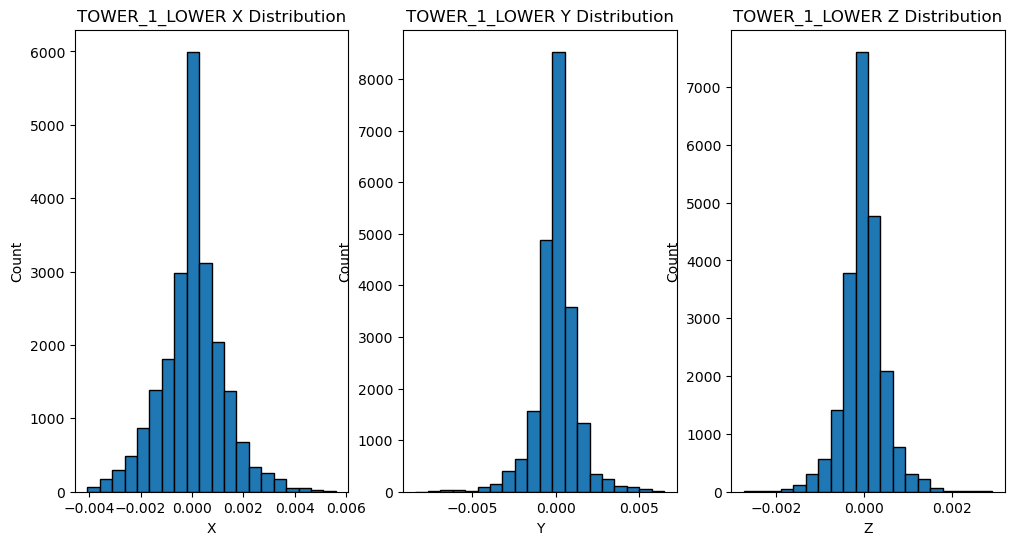

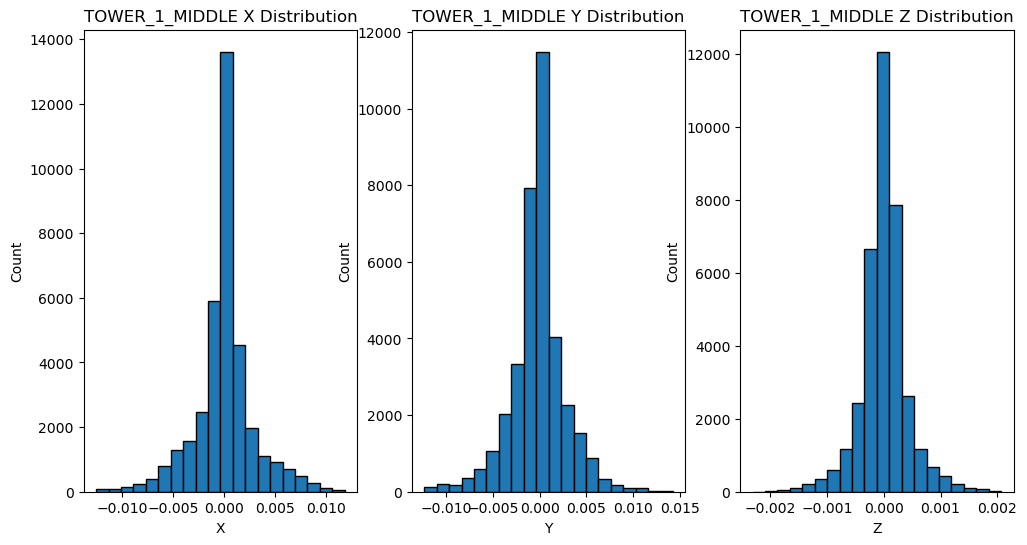

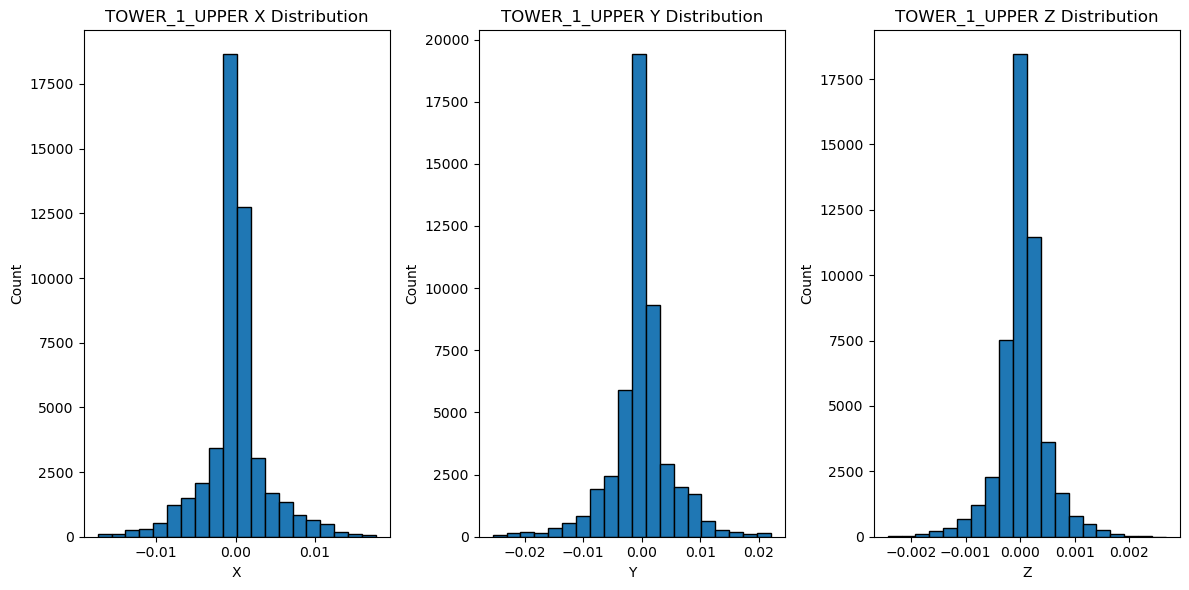

In [10]:
def plot_histograms(data, title_prefix):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.hist(data['X'], bins=20, edgecolor='black')
    plt.title(f'{title_prefix} X Distribution')
    plt.xlabel('X')
    plt.ylabel('Count')

    plt.subplot(1, 3, 2)
    plt.hist(data['Y'], bins=20, edgecolor='black')
    plt.title(f'{title_prefix} Y Distribution')
    plt.xlabel('Y')
    plt.ylabel('Count')

    plt.subplot(1, 3, 3)
    plt.hist(data['Z'], bins=20, edgecolor='black')
    plt.title(f'{title_prefix} Z Distribution')
    plt.xlabel('Z')
    plt.ylabel('Count')

# Plot histograms for Ground 
plot_histograms(TOWER_1_LOWER, 'TOWER_1_LOWER')

# Plot histograms for Middle 
plot_histograms(TOWER_1_MIDDLE, 'TOWER_1_MIDDLE')

# Plot histograms for Upper 
plot_histograms(TOWER_1_UPPER, 'TOWER_1_UPPER')

plt.tight_layout()
plt.show()

Here 'count' stands for the number of times the number occurs.

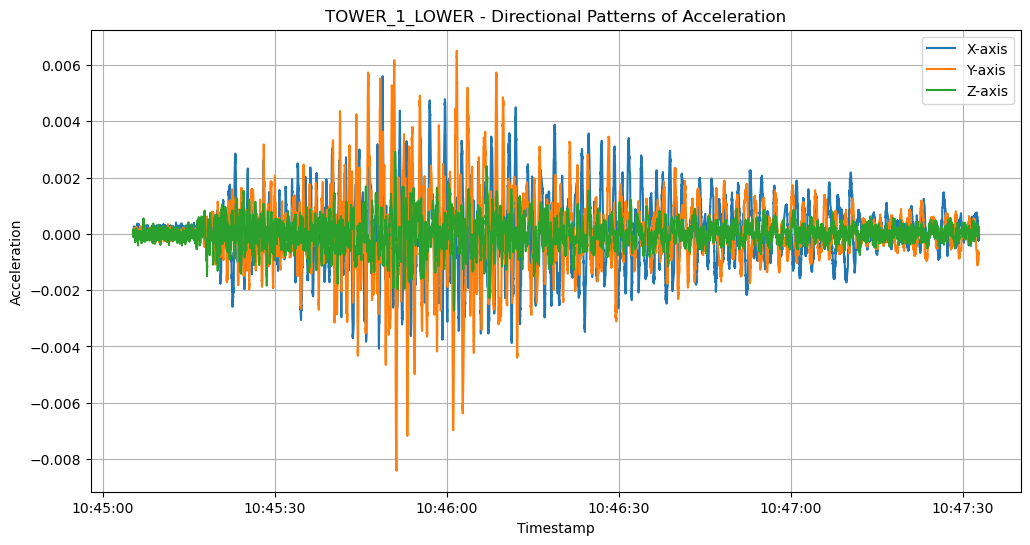

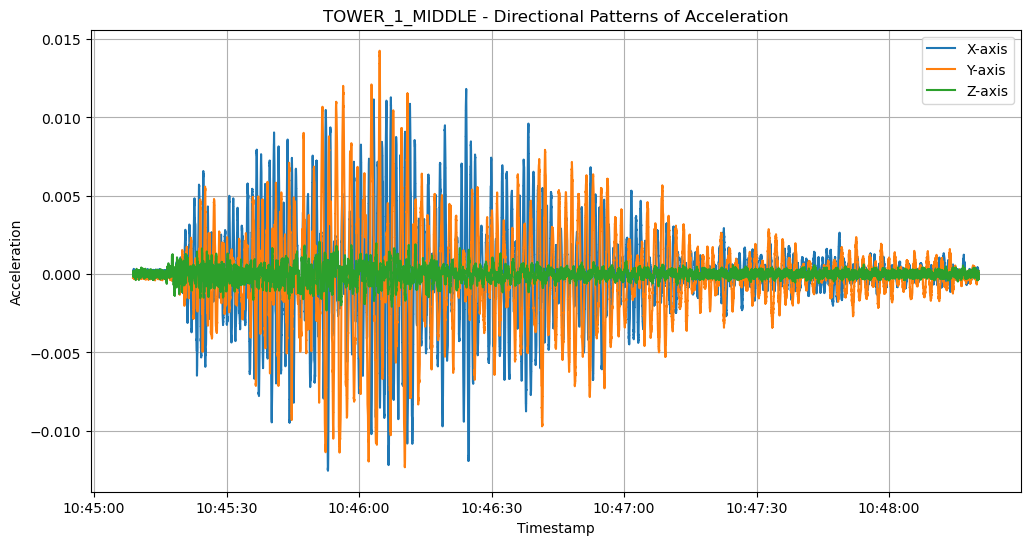

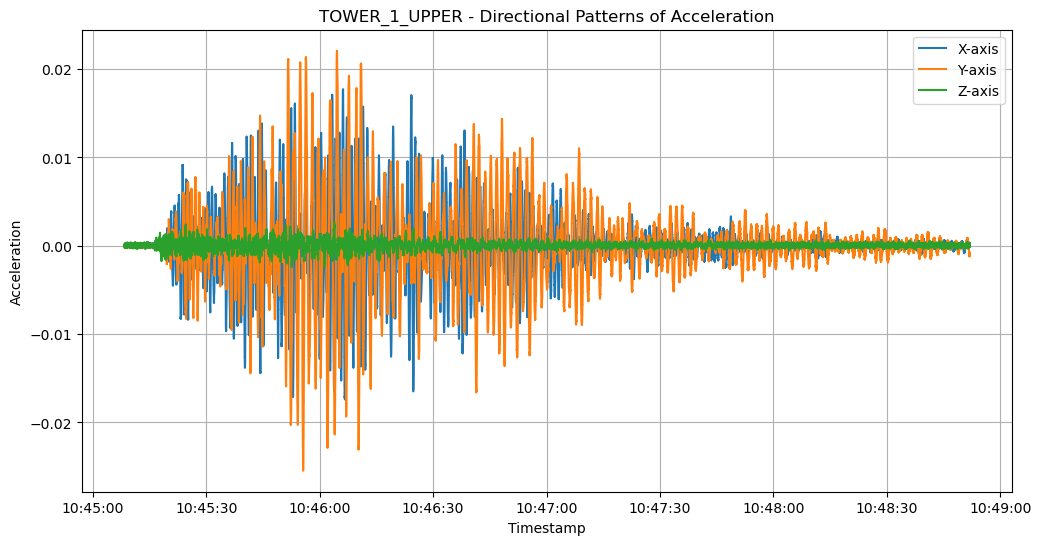

In [11]:
# Plot directional patterns
plt.figure(figsize=(12, 6))
plt.plot(TOWER_1_LOWER['Timestamp'], TOWER_1_LOWER['X'], label='X-axis')
plt.plot(TOWER_1_LOWER['Timestamp'], TOWER_1_LOWER['Y'], label='Y-axis')
plt.plot(TOWER_1_LOWER['Timestamp'], TOWER_1_LOWER['Z'], label='Z-axis')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.title('TOWER_1_LOWER - Directional Patterns of Acceleration')
plt.legend()
plt.grid()

plt.figure(figsize=(12, 6))
plt.plot(TOWER_1_MIDDLE['Timestamp'], TOWER_1_MIDDLE['X'], label='X-axis')
plt.plot(TOWER_1_MIDDLE['Timestamp'], TOWER_1_MIDDLE['Y'], label='Y-axis')
plt.plot(TOWER_1_MIDDLE['Timestamp'], TOWER_1_MIDDLE['Z'], label='Z-axis')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.title('TOWER_1_MIDDLE - Directional Patterns of Acceleration')
plt.legend()
plt.grid()

plt.figure(figsize=(12, 6))
plt.plot(TOWER_1_UPPER['Timestamp'], TOWER_1_UPPER['X'], label='X-axis')
plt.plot(TOWER_1_UPPER['Timestamp'], TOWER_1_UPPER['Y'], label='Y-axis')
plt.plot(TOWER_1_UPPER['Timestamp'], TOWER_1_UPPER['Z'], label='Z-axis')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.title('TOWER_1_UPPER - Directional Patterns of Acceleration')
plt.legend()
plt.grid()

plt.show()

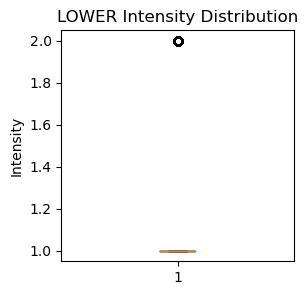

<Figure size 640x480 with 0 Axes>

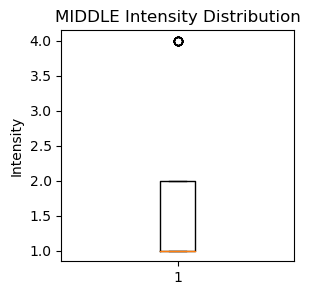

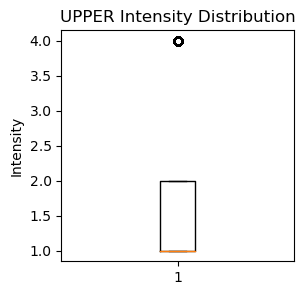

In [12]:
# Box plots for Intensity
plt.figure(figsize=(3, 3))
plt.boxplot(TOWER_1_LOWER['Intensity'])
plt.title('LOWER Intensity Distribution')
plt.ylabel('Intensity')
plt.show()

plt.tight_layout()
# Box plots for Intensity
plt.figure(figsize=(3, 3))
plt.boxplot(TOWER_1_MIDDLE['Intensity'])
plt.title('MIDDLE Intensity Distribution')
plt.ylabel('Intensity')
plt.show()

plt.figure(figsize=(3, 3))
plt.boxplot(TOWER_1_UPPER['Intensity'])
plt.title('UPPER Intensity Distribution')
plt.ylabel('Intensity')
plt.show()

These can be seen through the EDA:

1. Fluctuations in the instrument's detection value, which means that an emergency such as an earthquake may occur.
2. The intensity is 1-2.
3. The direction of the earthquake can be seen.

# 3. Identify the values before and after strong earthquake

In [13]:
#Absolutization
TOWER_1_LOWER_copy = TOWER_1_LOWER.copy()
TOWER_1_MIDDLE_copy = TOWER_1_MIDDLE.copy()
TOWER_1_UPPER_copy = TOWER_1_UPPER.copy()

TOWER_1_LOWER_copy['X'] = abs(TOWER_1_LOWER_copy['X'])
TOWER_1_LOWER_copy['Y'] = abs(TOWER_1_LOWER_copy['Y'])
TOWER_1_LOWER_copy['Z'] = abs(TOWER_1_LOWER_copy['Z'])

TOWER_1_MIDDLE_copy['X'] = abs(TOWER_1_MIDDLE_copy['X'])
TOWER_1_MIDDLE_copy['Y'] = abs(TOWER_1_MIDDLE_copy['Y'])
TOWER_1_MIDDLE_copy['Z'] = abs(TOWER_1_MIDDLE_copy['Z'])

TOWER_1_UPPER_copy['X'] = abs(TOWER_1_UPPER_copy['X'])
TOWER_1_UPPER_copy['Y'] = abs(TOWER_1_UPPER_copy['Y'])
TOWER_1_UPPER_copy['Z'] = abs(TOWER_1_UPPER_copy['Z'])

#TOWER 3
TOWER_3_LOWER_copy = TOWER_3_LOWER.copy()
TOWER_3_MIDDLE_copy = TOWER_3_MIDDLE.copy()
TOWER_3_UPPER_copy = TOWER_3_UPPER.copy()

TOWER_3_LOWER_copy['X'] = abs(TOWER_3_LOWER_copy['X'])
TOWER_3_LOWER_copy['Y'] = abs(TOWER_3_LOWER_copy['Y'])
TOWER_3_LOWER_copy['Z'] = abs(TOWER_3_LOWER_copy['Z'])

TOWER_3_MIDDLE_copy['X'] = abs(TOWER_3_MIDDLE_copy['X'])
TOWER_3_MIDDLE_copy['Y'] = abs(TOWER_3_MIDDLE_copy['Y'])
TOWER_3_MIDDLE_copy['Z'] = abs(TOWER_3_MIDDLE_copy['Z'])

TOWER_3_UPPER_copy['X'] = abs(TOWER_3_UPPER_copy['X'])
TOWER_3_UPPER_copy['Y'] = abs(TOWER_3_UPPER_copy['Y'])
TOWER_3_UPPER_copy['Z'] = abs(TOWER_3_UPPER_copy['Z'])

In [14]:
TOWER_1_LOWER_copy

,Timestamp,X,Y,Z,Intensity
0,2023-02-01 10:45:05.301,0.000031,0.000072,0.000097,1
1,2023-02-01 10:45:05.305,0.000105,0.000017,0.000160,1
2,2023-02-01 10:45:05.426,0.000110,0.000119,0.000027,1
3,2023-02-01 10:45:05.435,0.000229,0.000158,0.000031,1
4,2023-02-01 10:45:05.440,0.000226,0.000181,0.000059,1
...,...,...,...,...,...
22120,2023-02-01 10:47:32.710,0.000239,0.000634,0.000152,1
22121,2023-02-01 10:47:32.713,0.000250,0.000634,0.000258,1
22122,2023-02-01 10:47:32.715,0.000250,0.000634,0.000258,1
22123,2023-02-01 10:47:32.718,0.000250,0.000634,0.000258,1


In [15]:
pd.options.display.float_format = '{:.6f}'.format
#TOWER_1_LOWER_copy.describe()
#TOWER_1_MIDDLE_copy.describe()
TOWER_1_UPPER_copy.describe()

,X,Y,Z,Intensity
count,49250.000000,49250.000000,49250.000000,49250.000000
mean,0.002327,0.003218,0.000291,1.390701
std,0.003079,0.003913,0.000324,0.564975
min,0.000000,0.000001,0.000001,1.000000
25%,0.000273,0.000607,0.000081,1.000000
50%,0.000968,0.001637,0.000182,1.000000
75%,0.003198,0.004443,0.000367,2.000000
max,0.017717,0.025470,0.002676,4.000000


In [16]:
#TOWER_3_LOWER_copy.describe()
#TOWER_3_MIDDLE_copy.describe()
TOWER_3_UPPER_copy.describe()

,X,Y,Z,Intensity
count,36000.000000,36000.000000,36000.000000,36000.000000
mean,0.002064,0.002499,0.000276,1.345139
std,0.002608,0.003156,0.000305,0.516100
min,0.000002,0.000002,0.000000,1.000000
25%,0.000330,0.000447,0.000078,1.000000
50%,0.001020,0.001277,0.000175,1.000000
75%,0.002787,0.003294,0.000351,2.000000
max,0.017684,0.023889,0.002792,4.000000


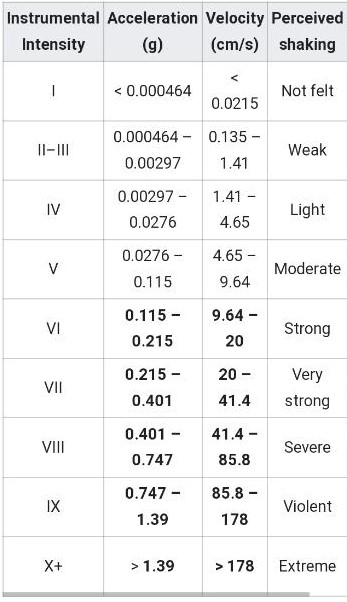

In [17]:
#criteria
Image(filename=r'C:\Users\LIMI\Desktop\standard.jpg')

Here the queue value can be set according to the criteria provided by Doc Emby

# TOWER 1

In [18]:
# Define a threshold for earthquake event detection
upper_threshold = 0.0276
lower_threshold = 0.000464

# Filter the Ground data
filtered_LOWER = TOWER_1_LOWER_copy[
    (TOWER_1_LOWER_copy['X'] <= upper_threshold) & (TOWER_1_LOWER_copy['X'] >= lower_threshold) &
    (TOWER_1_LOWER_copy['Y'] <= upper_threshold) & (TOWER_1_LOWER_copy['Y'] >= lower_threshold) &
    (TOWER_1_LOWER_copy['Z'] <= upper_threshold) & (TOWER_1_LOWER_copy['Z'] >= lower_threshold)]

# Filter the Middle data
filtered_MIDDLE = TOWER_1_MIDDLE_copy[
    (TOWER_1_MIDDLE_copy['X'] <= upper_threshold) & (TOWER_1_MIDDLE_copy['X'] >= lower_threshold) &
    (TOWER_1_MIDDLE_copy['Y'] <= upper_threshold) & (TOWER_1_MIDDLE_copy['Y'] >= lower_threshold) &
    (TOWER_1_MIDDLE_copy['Z'] <= upper_threshold) & (TOWER_1_MIDDLE_copy['Z'] >= lower_threshold)]

# Filter the Upper data
filtered_UPPER = TOWER_1_UPPER_copy[
    (TOWER_1_UPPER_copy['X'] <= upper_threshold) & (TOWER_1_UPPER_copy['X'] >= lower_threshold) &
    (TOWER_1_UPPER_copy['Y'] <= upper_threshold) & (TOWER_1_UPPER_copy['Y'] >= lower_threshold) &
    (TOWER_1_UPPER_copy['Z'] <= upper_threshold) & (TOWER_1_UPPER_copy['Z'] >= lower_threshold)]

# Reset index
filtered_LOWER.reset_index(drop=True, inplace=True)
filtered_MIDDLE.reset_index(drop=True, inplace=True)
filtered_UPPER.reset_index(drop=True, inplace=True)

# Set display format for floating-point numbers
pd.options.display.float_format = '{:.6f}'.format

print("Filtered TOWER_1_LOWER Data:")
print(filtered_LOWER.head())

print("Filtered TOWER_1_MIDDLE Data:")
print(filtered_MIDDLE.head())

print("Filtered TOWER_1_UPPER Data:")
print(filtered_UPPER.head())


Filtered TOWER_1_LOWER Data:
                Timestamp        X        Y        Z  Intensity
0 2023-02-01 10:45:19.990 0.000721 0.000532 0.000558          1
1 2023-02-01 10:45:20.178 0.000725 0.000723 0.000472          1
2 2023-02-01 10:45:20.498 0.001389 0.000552 0.000675          1
3 2023-02-01 10:45:20.503 0.001389 0.000552 0.000675          1
4 2023-02-01 10:45:20.507 0.001518 0.000580 0.000472          1
Filtered TOWER_1_MIDDLE Data:
                Timestamp        X        Y        Z  Intensity
0 2023-02-01 10:45:18.721 0.000707 0.000552 0.000656          1
1 2023-02-01 10:45:18.723 0.000707 0.000552 0.000656          1
2 2023-02-01 10:45:18.725 0.000707 0.000552 0.000656          1
3 2023-02-01 10:45:19.085 0.000643 0.000606 0.000475          1
4 2023-02-01 10:45:19.088 0.000643 0.000606 0.000475          1
Filtered TOWER_1_UPPER Data:
                Timestamp        X        Y        Z  Intensity
0 2023-02-01 10:45:18.461 0.000566 0.000467 0.000506          1
1 2023-02-01 10:

Through the following data sieve (according to the data_describtion), we can get that the acceleration collected by the instrument here is in the range of 0.000464-0.0276. Here, we can get the Instrumental Intensity as II-IV through the criterion. meanwhile, the Perceived shaking is weak and light.

# 4. Statistic Analysis

# 4.1 Statistical Description

In [19]:
datasets = [filtered_LOWER, filtered_MIDDLE, filtered_UPPER]
labels = ['LOWER', 'MIDDLE', 'UPPER']

# Loop through the datasets and calculate descriptive statistics for each axis
for label, dataset in zip(labels, datasets):
    mean_X = dataset['X'].mean()
    median_X = dataset['X'].median()
    std_deviation_X = dataset['X'].std()
    min_X = dataset['X'].min()
    max_X = dataset['X'].max()
    
    mean_Y = dataset['Y'].mean()
    median_Y = dataset['Y'].median()
    std_deviation_Y = dataset['Y'].std()
    min_Y = dataset['Y'].min()
    max_Y = dataset['Y'].max()
    
    mean_Z = dataset['Z'].mean()
    median_Z = dataset['Z'].median()
    std_deviation_Z = dataset['Z'].std()
    min_Z = dataset['Z'].min()
    max_Z = dataset['Z'].max()
    
    # Format the values as strings with a fixed number of decimal places
    def format_float(value):
        return '{:.6f}'.format(value)

    print(f"Descriptive Statistics for {label}:")
    print(f"X Axis - Mean: {format_float(mean_X)}, Median: {format_float(median_X)}, Std Deviation: {format_float(std_deviation_X)}, Min: {format_float(min_X)}, Max: {format_float(max_X)}")
    print(f"Y Axis - Mean: {format_float(mean_Y)}, Median: {format_float(median_Y)}, Std Deviation: {format_float(std_deviation_Y)}, Min: {format_float(min_Y)}, Max: {format_float(max_Y)}")
    print(f"Z Axis - Mean: {format_float(mean_Z)}, Median: {format_float(median_Z)}, Std Deviation: {format_float(std_deviation_Z)}, Min: {format_float(min_Z)}, Max: {format_float(max_Z)}")
    print("\n")


Descriptive Statistics for LOWER:
X Axis - Mean: 0.001563, Median: 0.001336, Std Deviation: 0.000864, Min: 0.000465, Max: 0.004906
Y Axis - Mean: 0.001646, Median: 0.001282, Std Deviation: 0.001132, Min: 0.000466, Max: 0.006979
Z Axis - Mean: 0.000841, Median: 0.000725, Std Deviation: 0.000351, Min: 0.000464, Max: 0.002913


Descriptive Statistics for MIDDLE:
X Axis - Mean: 0.004002, Median: 0.003320, Std Deviation: 0.002710, Min: 0.000465, Max: 0.012507
Y Axis - Mean: 0.003620, Median: 0.002931, Std Deviation: 0.002719, Min: 0.000470, Max: 0.014190
Z Axis - Mean: 0.000821, Median: 0.000729, Std Deviation: 0.000321, Min: 0.000464, Max: 0.002316


Descriptive Statistics for UPPER:
X Axis - Mean: 0.005189, Median: 0.004196, Std Deviation: 0.003782, Min: 0.000465, Max: 0.017176
Y Axis - Mean: 0.006441, Median: 0.005148, Std Deviation: 0.005176, Min: 0.000465, Max: 0.025470
Z Axis - Mean: 0.000845, Median: 0.000741, Std Deviation: 0.000350, Min: 0.000465, Max: 0.002676




Here we see that the maximum value of the dataset is used as the maximum value of the filtered dataset, which proves that the filtered dataset has not missed any selection

# Finding the data peaks

In [20]:
#LOWER
max_x = filtered_LOWER['X'].max()
max_y = filtered_LOWER['Y'].max()
max_z = filtered_LOWER['Z'].max()

print(f"Maximum X: {filtered_LOWER.loc[filtered_LOWER['X'].idxmax()]['Timestamp']}: {max_x}")
print(f"Maximum Y: {filtered_LOWER.loc[filtered_LOWER['Y'].idxmax()]['Timestamp']}: {max_y}")
print(f"Maximum Z: {filtered_LOWER.loc[filtered_LOWER['Z'].idxmax()]['Timestamp']}: {max_z}")

Maximum X: 2023-02-01 10:45:48.847000: 0.0049055448
Maximum Y: 2023-02-01 10:46:01.136000: 0.00697943554286
Maximum Z: 2023-02-01 10:45:50.970000: 0.00291346045714


In [21]:
#MIDDLE
max_x = filtered_MIDDLE['X'].max()
max_y = filtered_MIDDLE['Y'].max()
max_z = filtered_MIDDLE['Z'].max()

print(f"Maximum X: {filtered_MIDDLE.loc[filtered_MIDDLE['X'].idxmax()]['Timestamp']}: {max_x}")
print(f"Maximum Y: {filtered_MIDDLE.loc[filtered_MIDDLE['Y'].idxmax()]['Timestamp']}: {max_y}")
print(f"Maximum Z: {filtered_MIDDLE.loc[filtered_MIDDLE['Z'].idxmax()]['Timestamp']}: {max_z}")

Maximum X: 2023-02-01 10:45:52.916000: 0.0125066409
Maximum Y: 2023-02-01 10:46:04.624000: 0.0141903684
Maximum Z: 2023-02-01 10:45:52.599000: 0.0023162255999999


In [22]:
#UPPER
max_x = filtered_UPPER['X'].max()
max_y = filtered_UPPER['Y'].max()
max_z = filtered_UPPER['Z'].max()

print(f"Maximum X: {filtered_UPPER.loc[filtered_UPPER['X'].idxmax()]['Timestamp']}: {max_x}")
print(f"Maximum Y: {filtered_UPPER.loc[filtered_UPPER['Y'].idxmax()]['Timestamp']}: {max_y}")
print(f"Maximum Z: {filtered_UPPER.loc[filtered_UPPER['Z'].idxmax()]['Timestamp']}: {max_z}")

Maximum X: 2023-02-01 10:46:06.614000: 0.0171760017
Maximum Y: 2023-02-01 10:45:55.619000: 0.0254699601
Maximum Z: 2023-02-01 10:46:03.814000: 0.002676258


The peaks collected by the instruments when an earthquake occurs are found here. The analysis says that the largest seismic wave was generated at 10:45:55 on February 1, 2023.

The next step was to find the data set before and after the strong earthquake. Then use statistical analysis.

In [23]:
#print(filtered_LOWER.tail())

# Divide the data set before and after strong earthquakes --LOWER

In [24]:
# Define the timestamp indicating the start of the strong earthquake
earthquake_start_timestamp = pd.to_datetime('2023-02-01 10:45:19')

# Define the peak timestamp
earthquake_peak_timestamp = pd.to_datetime('2023-02-01 10:45:55')

# Define the tail timestamp
earthquake_tail_timestamp = pd.to_datetime('2023-02-01 10:47:08')

# Create two subsets based on timestamps
before_earthquake = filtered_LOWER[filtered_LOWER['Timestamp'] < earthquake_peak_timestamp]
after_earthquake = filtered_LOWER[filtered_LOWER['Timestamp'] > earthquake_peak_timestamp]

# Print the first few rows of each subset
print("Subset Before Earthquake:")
print(before_earthquake.head())

print("\nSubset After Earthquake:")
print(after_earthquake.head())

Subset Before Earthquake:
                Timestamp        X        Y        Z  Intensity
0 2023-02-01 10:45:19.990 0.000721 0.000532 0.000558          1
1 2023-02-01 10:45:20.178 0.000725 0.000723 0.000472          1
2 2023-02-01 10:45:20.498 0.001389 0.000552 0.000675          1
3 2023-02-01 10:45:20.503 0.001389 0.000552 0.000675          1
4 2023-02-01 10:45:20.507 0.001518 0.000580 0.000472          1

Subset After Earthquake:
                   Timestamp        X        Y        Z  Intensity
1049 2023-02-01 10:45:55.289 0.002324 0.004541 0.000682          2
1050 2023-02-01 10:45:55.297 0.002324 0.004791 0.000538          2
1051 2023-02-01 10:45:55.304 0.002655 0.004818 0.000745          2
1052 2023-02-01 10:45:55.313 0.002534 0.004919 0.000682          2
1053 2023-02-01 10:45:55.330 0.002768 0.004791 0.000990          2


# Viewable before and after a strong earthquake---LOWER

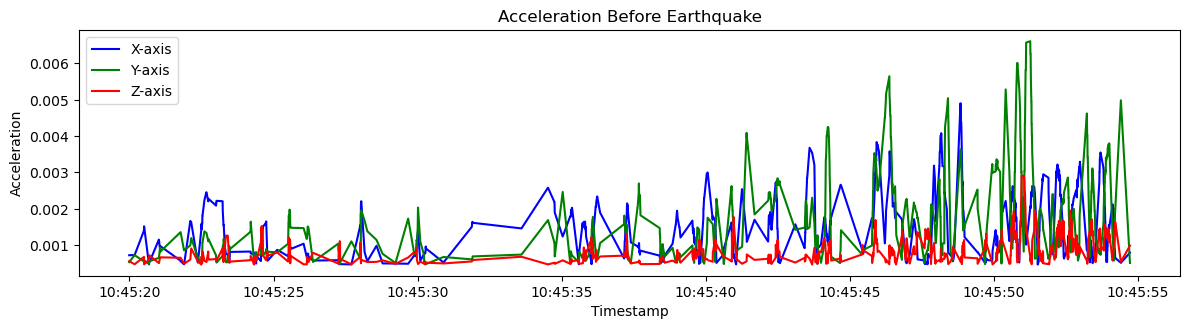

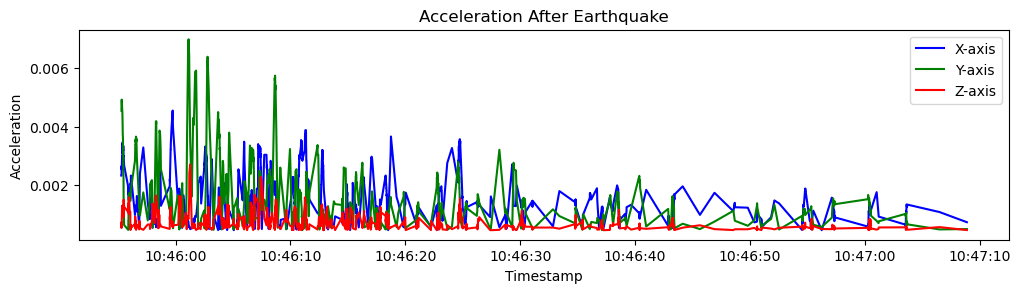

In [25]:
#LOWER
# Plot X, Y, and Z axes for 'before_earthquake'
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)  # Create a subplot for X and Y axes
plt.plot(before_earthquake['Timestamp'], before_earthquake['X'], label='X-axis', color='blue')
plt.plot(before_earthquake['Timestamp'], before_earthquake['Y'], label='Y-axis', color='green')
plt.plot(before_earthquake['Timestamp'], before_earthquake['Z'], label='Z-axis', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.title('Acceleration Before Earthquake')
plt.legend()

plt.tight_layout()

# Plot X, Y, and Z axes for 'after_earthquake'
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)  # Create a subplot for X and Y axes
plt.plot(after_earthquake['Timestamp'], after_earthquake['X'], label='X-axis', color='blue')
plt.plot(after_earthquake['Timestamp'], after_earthquake['Y'], label='Y-axis', color='green')
plt.plot(after_earthquake['Timestamp'], after_earthquake['Z'], label='Z-axis', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.title('Acceleration After Earthquake')
plt.legend()

# Show the plots
plt.show()


# 4.2 Linear Regression---LOWER

In [26]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [27]:
#before_earthquake
before_earthquake_copy = pd.DataFrame(before_earthquake)
before_earthquake_copy["Timestamp"] = pd.to_datetime(before_earthquake_copy["Timestamp"])

# Set the time interval (here set to 1 second)
time_interval = pd.Timedelta(seconds=1)

# Set the time column as an index
before_earthquake_copy.set_index("Timestamp", inplace=True)

# Group by time interval and select the first data point in each group
before_earthquake_copy = before_earthquake_copy.resample(time_interval).first().reset_index()
before_earthquake_copy = before_earthquake_copy.dropna()
print(before_earthquake_copy)

#after_earthquake
after_earthquake_copy = pd.DataFrame(after_earthquake)
after_earthquake_copy["Timestamp"] = pd.to_datetime(after_earthquake_copy["Timestamp"])

time_interval = pd.Timedelta(seconds=1)

after_earthquake_copy.set_index("Timestamp", inplace=True)

after_earthquake_copy = after_earthquake_copy.resample(time_interval).first().reset_index()
after_earthquake_copy = after_earthquake_copy.dropna()
after_earthquake_copy = after_earthquake_copy.head(35)

print(after_earthquake_copy)

             Timestamp        X        Y        Z  Intensity
0  2023-02-01 10:45:19 0.000721 0.000532 0.000558   1.000000
1  2023-02-01 10:45:20 0.000725 0.000723 0.000472   1.000000
2  2023-02-01 10:45:21 0.001150 0.000650 0.000503   1.000000
3  2023-02-01 10:45:22 0.001665 0.000992 0.000600   1.000000
4  2023-02-01 10:45:23 0.002086 0.000715 0.000616   2.000000
5  2023-02-01 10:45:24 0.000822 0.001363 0.000585   1.000000
6  2023-02-01 10:45:25 0.000869 0.000802 0.000800   1.000000
7  2023-02-01 10:45:26 0.001038 0.001468 0.000472   1.000000
8  2023-02-01 10:45:27 0.000584 0.001040 0.000491   1.000000
9  2023-02-01 10:45:28 0.001548 0.000622 0.000679   1.000000
10 2023-02-01 10:45:29 0.000491 0.000509 0.000483   1.000000
11 2023-02-01 10:45:30 0.001290 0.001445 0.000515   1.000000
12 2023-02-01 10:45:31 0.001501 0.000606 0.000550   1.000000
14 2023-02-01 10:45:33 0.001459 0.000739 0.000679   1.000000
15 2023-02-01 10:45:34 0.002579 0.001687 0.000468   1.000000
16 2023-02-01 10:45:35 0

Here it was taken to take only the first data every second, because the dataset SHAPE was not balanced before and after the strong earthquake, so here it was to narrow down the dataset for the later regression analysis.

Here, the 35 numerical volumes after the strong earthquake are consistent with the values before the strong earthquake for later regression analysis.


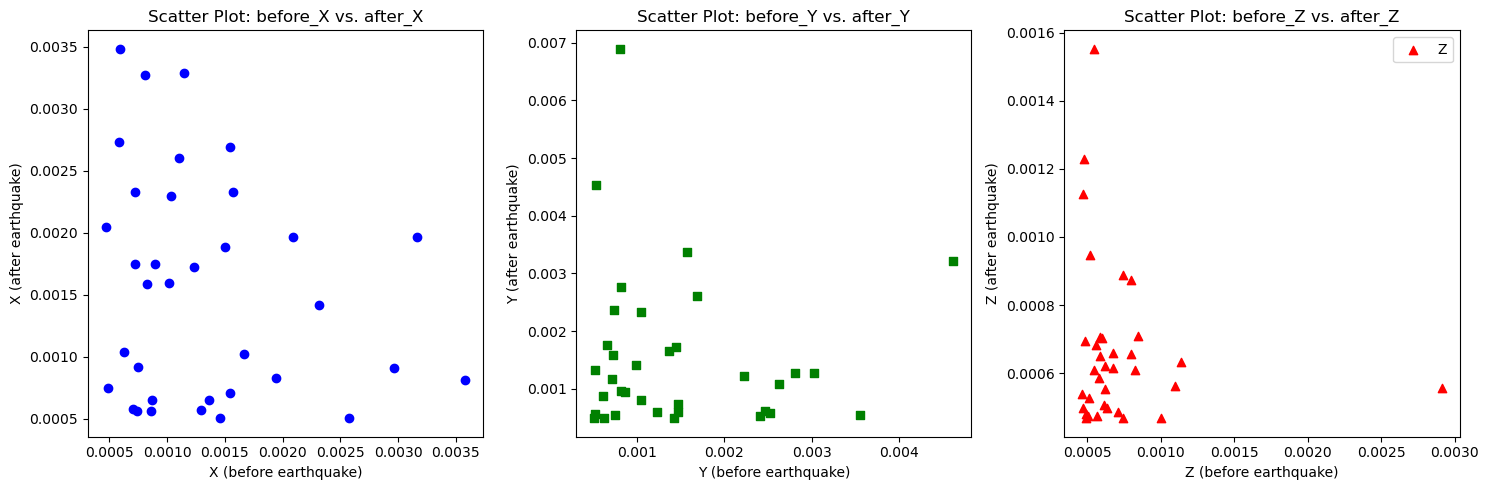

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Scatter plot for 'X'
plt.subplot(131)  
plt.scatter(before_earthquake_copy['X'], after_earthquake_copy['X'], label='X', color='blue', marker='o')
plt.xlabel('X (before earthquake)')
plt.ylabel('X (after earthquake)')
plt.title('Scatter Plot: before_X vs. after_X')

# Scatter plot for 'Y'
plt.subplot(132)  
plt.scatter(before_earthquake_copy['Y'], after_earthquake_copy['Y'], label='Y', color='green', marker='s')
plt.xlabel('Y (before earthquake)')
plt.ylabel('Y (after earthquake)')
plt.title('Scatter Plot: before_Y vs. after_Y')

# Scatter plot for 'Z'
plt.subplot(133) 
plt.scatter(before_earthquake_copy['Z'], after_earthquake_copy['Z'], label='Z', color='red', marker='^')
plt.xlabel('Z (before earthquake)')
plt.ylabel('Z (after earthquake)')
plt.title('Scatter Plot: before_Z vs. after_Z')

plt.legend()
plt.tight_layout()
plt.show()

In [29]:
#before_earthquake_copy = before_earthquake_copy[::-1].reset_index(drop=True)
#before_earthquake_copy.head()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the before_earthquake dataset
X_before_earthquake = before_earthquake_copy[['X', 'Y', 'Z']]
X_train_before, X_test_before = train_test_split(X_before_earthquake, test_size=0.3, random_state=42)

# Split the after_earthquake dataset
X_after_earthquake = after_earthquake_copy[['X', 'Y', 'Z']]
X_train_after, X_test_after = train_test_split(X_after_earthquake, test_size=0.3, random_state=42)

# Linear regression
model = LinearRegression()  
model.fit(X_train_before, X_train_after)

y_pred_before = model.predict(X_test_before)
mse_before = mean_squared_error(X_test_after, y_pred_before)
rmse_before = np.sqrt(mse_before)

print(f"Mean Squared Error: {mse_before:.12f}")
print(f"Root Mean Squared Error: {rmse_before:.12f}")

Mean Squared Error: 0.000000675200
Root Mean Squared Error: 0.000821705411


Here it can be seen that the linear regression model is well fitted. This suggests that the data before and after a strong earthquake are likely to be linearly related.It is logical to understand this from common sense.

# 4.3 Time series analysis----LOWER

In [31]:
# Set the cutoff point between the training and test sets
boundary_date = pd.to_datetime('2023-02-01 10:45:55')

# Delineate training and test sets
train_set = before_earthquake[before_earthquake['Timestamp'] < boundary_date]
test_set = after_earthquake[after_earthquake['Timestamp'] >= boundary_date]

In [32]:
train_set

,Timestamp,X,Y,Z,Intensity
0,2023-02-01 10:45:19.990,0.000721,0.000532,0.000558,1
1,2023-02-01 10:45:20.178,0.000725,0.000723,0.000472,1
2,2023-02-01 10:45:20.498,0.001389,0.000552,0.000675,1
3,2023-02-01 10:45:20.503,0.001389,0.000552,0.000675,1
4,2023-02-01 10:45:20.507,0.001518,0.000580,0.000472,1
...,...,...,...,...,...
1044,2023-02-01 10:45:54.212,0.000647,0.001980,0.001634,1
1045,2023-02-01 10:45:54.215,0.000647,0.001980,0.001634,1
1046,2023-02-01 10:45:54.218,0.000647,0.001980,0.001634,1
1047,2023-02-01 10:45:54.414,0.000512,0.004987,0.000538,1


The Augmented Dickey Fuller test (ADF test) is a common statistical test used to test whether a given time series is smooth or not. It is one of the most common statistical tests used when analyzing the smoothness of a series. When the test statistic is below the threshold value shown, you reject the null hypothesis and infer that the time series is smooth.

In [33]:
from statsmodels.tsa.stattools import adfuller

#X
result_X = adfuller(train_set['X'])
p_value_X = result_X[1]

#Y
result_Y = adfuller(train_set['Y'])
p_value_Y = result_Y[1]

#Z
result_Z = adfuller(train_set['Z'])
p_value_Z = result_Z[1]

print(f'ADF p-value for X: {p_value_X:.12f}')
print(f'ADF p-value for Y: {p_value_Y:.12f}')
print(f'ADF p-value for Z: {p_value_Z:.12f}')

ADF p-value for X: 0.000000003494
ADF p-value for Y: 0.003236409934
ADF p-value for Z: 0.000000000045


Here the optimal parameters are selected automatically by auto_arima

Here the dataset has been downscaled to turn three sets of values into one in order to satisfy the time series format

In [34]:
import pmdarima as pm
import numpy as np

# Numeric columns only
numeric_columns = ['X', 'Y', 'Z']
train_set_numeric = train_set[numeric_columns]

# Merged into a one-dimensional array
y = train_set_numeric.to_numpy().ravel()

# Fitting ARIMA models using pmdarima
model = pm.auto_arima(y, error_action='ignore', trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-41329.297, Time=2.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-32572.969, Time=0.46 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-33484.557, Time=1.50 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-32570.957, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-32574.968, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-33480.459, Time=1.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-41331.299, Time=2.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-34920.282, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-41323.947, Time=1.84 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-41327.679, Time=1.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-41331.256, Time=2.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-40117.993, Time=4.40 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-41333.296, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-34921.891, Time=0.16 sec
 ARIM

In [35]:
train_set_numeric

,X,Y,Z
0,0.000721,0.000532,0.000558
1,0.000725,0.000723,0.000472
2,0.001389,0.000552,0.000675
3,0.001389,0.000552,0.000675
4,0.001518,0.000580,0.000472
...,...,...,...
1044,0.000647,0.001980,0.001634
1045,0.000647,0.001980,0.001634
1046,0.000647,0.001980,0.001634
1047,0.000512,0.004987,0.000538


C:\Users\LIMI\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


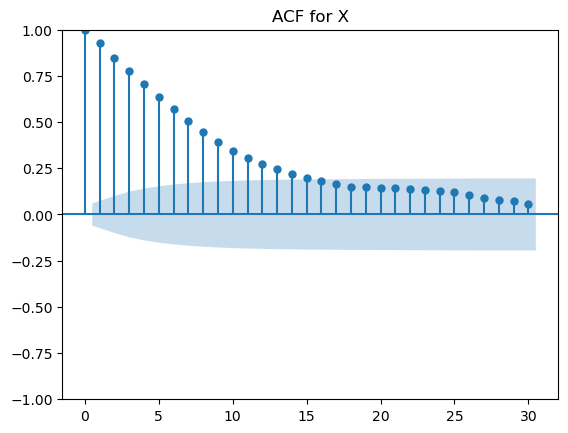

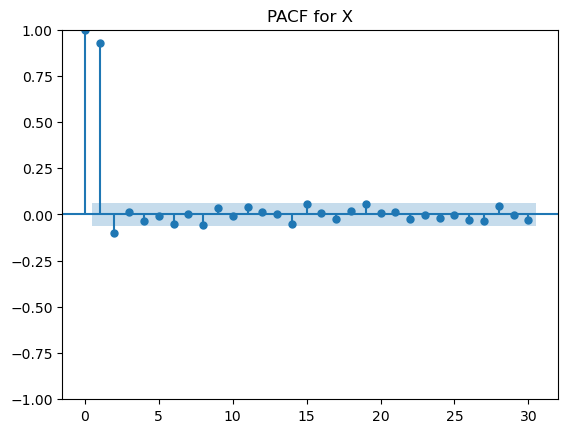

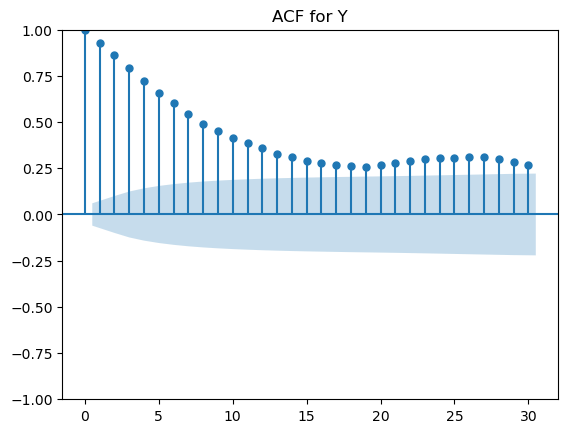

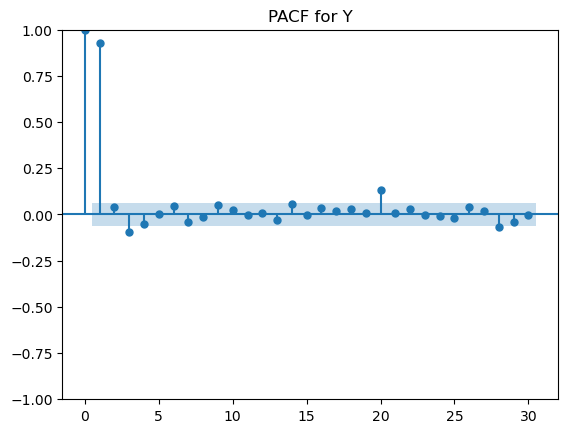

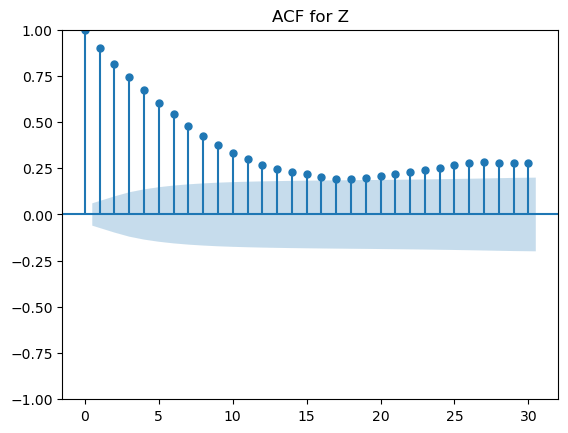

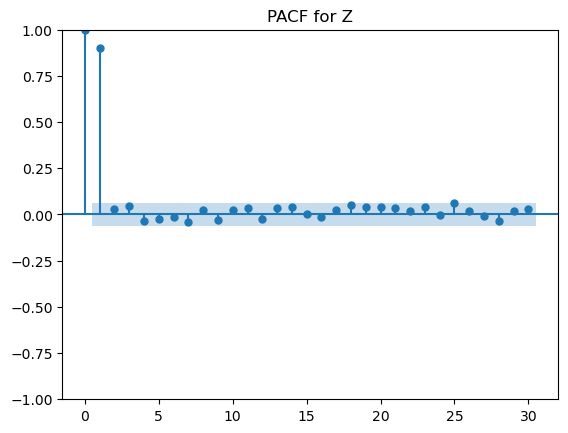

In [36]:
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Define your train_set_numeric here
def is_ma(acf_values, pacf_values):
    return True  

def is_ar(acf_values, pacf_values):
    return True  

def is_arma(acf_values, pacf_values):
    return True  

numeric_columns = ['X', 'Y', 'Z']

# Calculate ACF and PACF for each column separately
for column in numeric_columns:
    acf_values = acf(train_set_numeric[column])
    pacf_values = pacf(train_set_numeric[column])

    # Plot ACF and PACF for the current column
    plot_acf(train_set_numeric[column], lags=30, title=f'ACF for {column}')
    plot_pacf(train_set_numeric[column], lags=30, title=f'PACF for {column}')

From the ACF and PACF plots, it can be obtained that the AR model should be used

Based on the properties of the AR model, only the p is selected here which is 2

In [37]:
import statsmodels.api as sm

#Split X, Y, Z columns
endog_X = train_set_numeric['X']
endog_Y = train_set_numeric['Y']
endog_Z = train_set_numeric['Z']

mod_X = sm.tsa.AutoReg(endog_X, lags=2)
mod_fit_X = mod_X.fit()

mod_Y = sm.tsa.AutoReg(endog_Y, lags=2)
mod_fit_Y = mod_Y.fit()

mod_Z = sm.tsa.AutoReg(endog_Z, lags=2)
mod_fit_Z = mod_Z.fit()

In [38]:
print(mod_fit_X.summary())

                            AutoReg Model Results                             
Dep. Variable:                      X   No. Observations:                 1049
Model:                     AutoReg(2)   Log Likelihood                6901.739
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Sun, 17 Sep 2023   AIC                         -13795.479
Time:                        17:45:19   BIC                         -13775.664
Sample:                             2   HQIC                        -13787.964
                                 1049                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   2.11e-05      5.886      0.000    8.29e-05       0.000
X.L1           1.0199      0.031     33.155      0.000       0.960       1.080
X.L2          -0.0979      0.031     -3.181      0.0

Here to do the model fitting, from the effect graph on the model fitting is still good

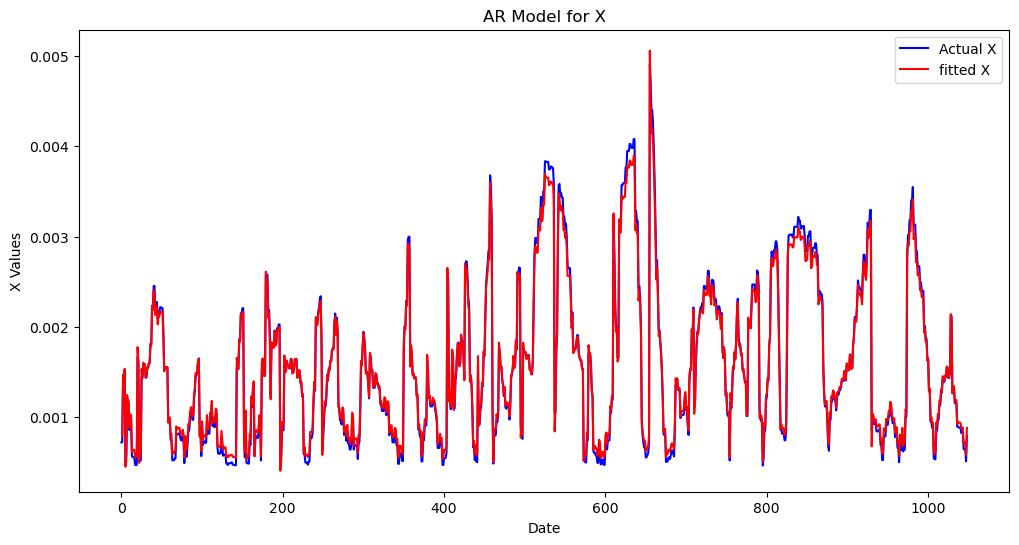

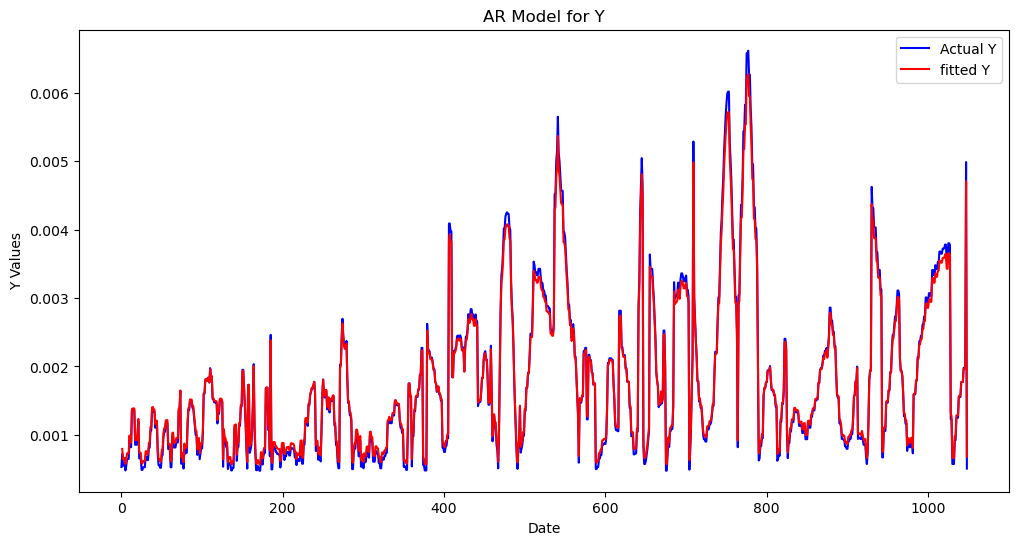

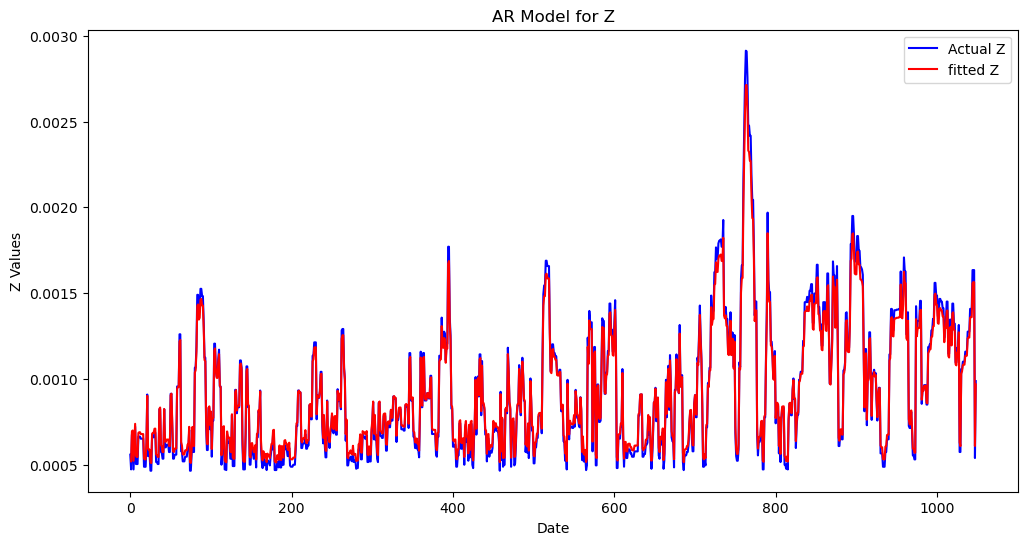

In [39]:
# The fitted image of the X-graph
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(endog_X.index, endog_X.values, label='Actual X', color='blue')
pred_X = mod_fit_X.predict(start=2, end=len(train_set_numeric), dynamic=False)
ax.plot(endog_X.index[1:], pred_X, label='fitted X', color='red')
ax.set_xlabel('Date')
ax.set_ylabel('X Values')
ax.set_title('AR Model for X')
ax.legend()

# The fitted image of the Y-graph
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(endog_Y.index, endog_Y.values, label='Actual Y', color='blue')
pred_Y = mod_fit_Y.predict(start=2, end=len(train_set_numeric), dynamic=False)
ax.plot(endog_Y.index[1:], pred_Y, label='fitted Y', color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Y Values')
ax.set_title('AR Model for Y')
ax.legend()

# The fitted image of the Z-graph
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(endog_Z.index, endog_Z.values, label='Actual Z', color='blue')
pred_Z = mod_fit_Z.predict(start=2, end=len(train_set_numeric), dynamic=False)
ax.plot(endog_Z.index[1:], pred_Z, label='fitted Z', color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Z Values')
ax.set_title('AR Model for Z')
ax.legend()

plt.show()


C:\Users\LIMI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LIMI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LIMI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LIMI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\LIMI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will 

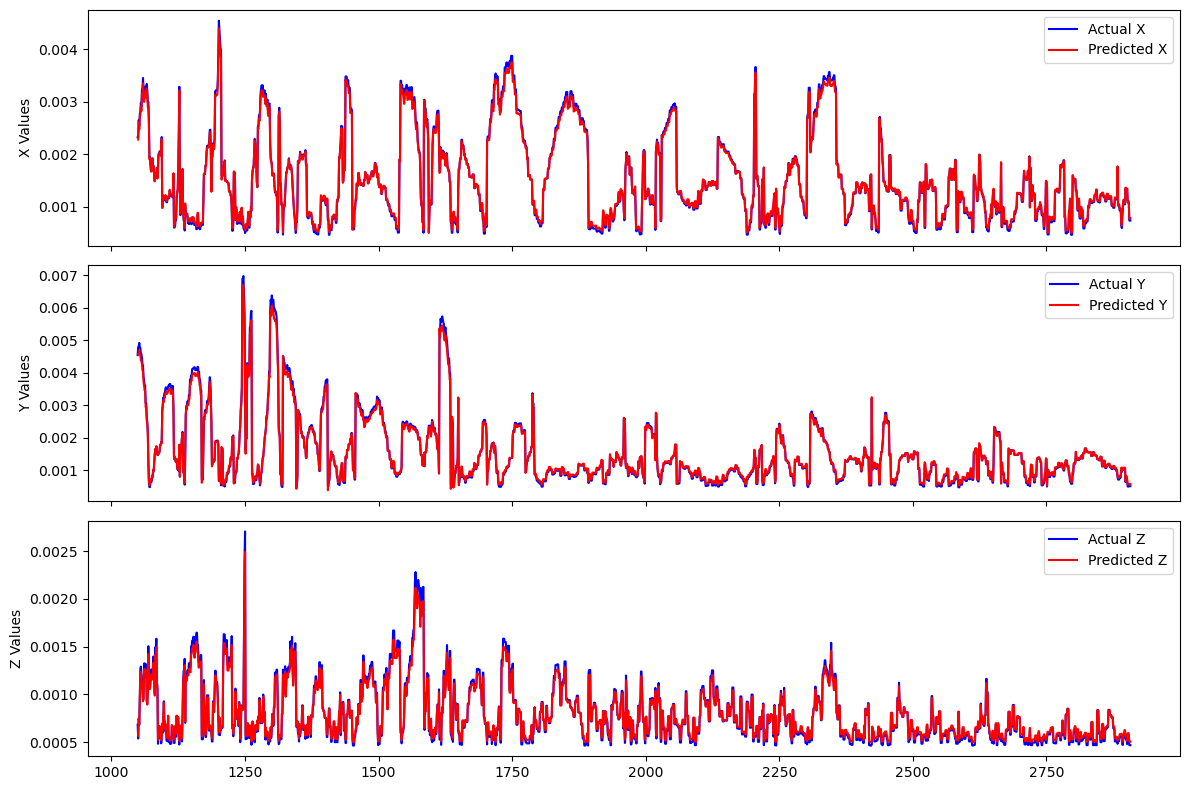

In [40]:
#Test set 
import statsmodels.api as sm
import matplotlib.pyplot as plt

numeric_columns = ['X', 'Y', 'Z']
test_set_numeric = test_set[numeric_columns]

endog2_X = test_set_numeric['X']
endog2_Y = test_set_numeric['Y']
endog2_Z = test_set_numeric['Z']

# Fit separate models for X, Y, and Z
modX = sm.tsa.AutoReg(endog2_X, lags=2)
modY = sm.tsa.AutoReg(endog2_Y, lags=2)
modZ = sm.tsa.AutoReg(endog2_Z, lags=2)

modX_fit = modX.fit()
modY_fit = modY.fit()
modZ_fit = modZ.fit()

# Plot the predictions for each column
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

ax1.plot(endog2_X.index, endog2_X, label='Actual X', color='blue')
pred_X = modX_fit.predict(start=2, end=len(test_set_numeric), dynamic=False)
ax1.plot(endog2_X.index[1:], pred_X, label='Predicted X', color='red') 
ax1.set_ylabel('X Values')
ax1.legend()

ax2.plot(endog2_Y.index, endog2_Y, label='Actual Y', color='blue')
pred_Y = modY_fit.predict(start=2, end=len(test_set_numeric), dynamic=False)
ax2.plot(endog2_Y.index[1:], pred_Y, label='Predicted Y', color='red')  
ax2.set_ylabel('Y Values')
ax2.legend()

ax3.plot(endog2_Z.index, endog2_Z, label='Actual Z', color='blue')
pred_Z = modZ_fit.predict(start=2, end=len(test_set_numeric), dynamic=False)
ax3.plot(endog2_Z.index[1:], pred_Z, label='Predicted Z', color='red')  
ax3.set_ylabel('Z Values')
ax3.legend()

plt.tight_layout()
plt.show()


Here the predicted values are compared with the values of the test set and the model is found to be usable

The next step is to do an error value analysis

In [41]:
#Error value analysis
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate MSE and RMSE for X
mse_X = mean_squared_error(endog2_X[1:], pred_X)
print(f"MSE for X: {mse_X:.12f}")
rmse_X = np.sqrt(mse_X)
print(f"RMSE for X: {rmse_X:.12f}")

# Calculate MSE and RMSE for Y
mse_Y = mean_squared_error(endog2_Y[1:], pred_Y)
print(f"MSE for Y: {mse_Y:.12f}")
rmse_Y = np.sqrt(mse_Y)
print(f"RMSE for Y: {rmse_Y:.12f}")

# Calculate MSE and RMSE for Z
mse_Z = mean_squared_error(endog2_Z[1:], pred_Z)
print(f"MSE for Z: {mse_Z:.12f}")
rmse_Z = np.sqrt(mse_Z)
print(f"RMSE for Z: {rmse_Z:.12f}")


MSE for X: 0.000000002093
RMSE for X: 0.000045746127
MSE for Y: 0.000000005418
RMSE for Y: 0.000073604586
MSE for Z: 0.000000001260
RMSE for Z: 0.000035500145


Here the error value also shows that the model is capable of time prediction.Tolerance values are also within acceptable limits

Here the dataset before the strong earthquake is used as the training set and the dataset after the strong earthquake is considered as the test set to compare the change in frequency. It is found that the model built is basically able to predict the dataset after a strong earthquake, which indicates that there is no significant change in the frequency of the instrument.

# 5. Conclusion

The main objective of this jupyter notebook is to use Statistical methods to analyze the frequency before and after the strong earthquake.The statistical conclusions obtained in this study are only for the TOWER1_LOWER dataset. The methodology is the same for the other datasets.
Here the following conclusions can be obtained from TOWER1_LOWER:

(1). The intensity of the earthquakes was probably of magnitude II-IV. It is a very mild type of earthquake.The strongest earthquake occurred at 10:45:55 on February 1, 2023

(2). Through linear regression analysis, we can get: the data before and after the strong earthquake are basically linear regression. The predicted data from the model trained in the training set basically matches the data in the test set. This indicates that the buildings were not damaged.

(3). Through time series analysis, we can get: the data set before the strong earthquake is used as the training set, and the AR time series model is built to predict the test set. The prediction results basically match the test set. This also indicates that the building did not suffer damage.